In [1]:
# ANS 1 : key features of red wine data is 
# 3 - citric acid 
# 9 - pH 
# 10 - sulphates 
# 11 - alcohol 

# because these features are the most  correlated ones in terms of   both negative and positive
# pH is most negatively correlated to quality so, as pH increseas quality of wine  will decrease
# citric acid , alcohol , sulphates are the most positively correlated , quality of wine   will increase if they will increase

In [2]:
# ANS 2 :
# There are no missing values in red wine dataset , but there are duplicates values 
# we have droped using drop_duplicates function
# If red wine dataset contains missing values then we have handle it by missing value techniques
# 1. as all the features are numerical so, we can fill the missing values by taking the mean
#     of that feature if there no outliers present in that feature
# 2. we can fill it by median of that feature if there are outliers present in it
# 3. we use mode but in case categorical featue
# 4. droping the missing values

# Dropping missing values:
# Advantages: Simplicity, preserves complete cases.
# Disadvantages: May lead to loss of valuable information, reduced sample size.

# Mean/median/mode imputation:
# Advantages: Easy to implement, preserves sample size.
# Disadvantages: Ignores relationships between variables, may introduce bias and underestimate variability.


In [3]:
# ANS 3 : key features of Student performance data that affects the students scores
# key features are :
# lunch : having lunch before test (standard or free/reduced)
# test preparation course : complete or not complete before test

# 1. standard lunch helps students perform well in exam
# 2. standard lunch helps students perform well in exam be male or female

# 1. Those who have completed the course have scored better in exam
# 2. Those who have completed the course have scored better in exam be it male or female

# we can go analyzing these techniques using statistics
# 1.Correlation analysis: Determine the strength and direction of the relationship between two continuous variables using 
#    correlation coefficients such as Pearson's correlation or Spearman's rank correlation.
# 2.We can visualize different graps of there distribution by checking whether it is normal or skewed distribution
# 3.Summarize the data using descriptive statistics such as mean, median, standard deviation, 
#     or graphical techniques like histograms or box plots.
# 4.Hypothesis formulation: Formulate specific hypotheses about the relationships 
#    between the factors based on prior knowledge, theory, or observations

In [4]:
# ANS 4 :
#  feature engineering in the context of the student performance data set.
#  so, first i will take all numerical features and normalize it using Minmax scaler technique
# giving them a range between 0-1

# Now its time for categorical features 

# gender : sex of students -> (Male/female)
# race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
# parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
# lunch : having lunch before test (standard or free/reduced)
# test preparation course : complete or not complete before test

# for "test preapration course" ,"lunch"  will use the label encoding technique
# Label Encoding assigns a unique integer value to each category in a categorical variable, 
# without considering any specific order or ranking. 
# Each category is encoded independently of the others.
# for example we have different colours like red,blue,green,yellow
# each will assigned a particular integer value

# for "gender" , "race/ethnicity" i will use one hot encoding technique
# where each variable represents one unique category and assign a binary value to each category 
# These binary variables would be independent of each other 

# for  "parental level of education" i will use ordinal encoding technique
# Ordinal Encoding assigns a unique integer value to each category in a categorical variable, 
#  based on their order or ranking. 
# It is suitable when there is an inherent order or hierarchy among the categories.

In [12]:
# ANS 5 :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv("winequality-red.csv")

In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

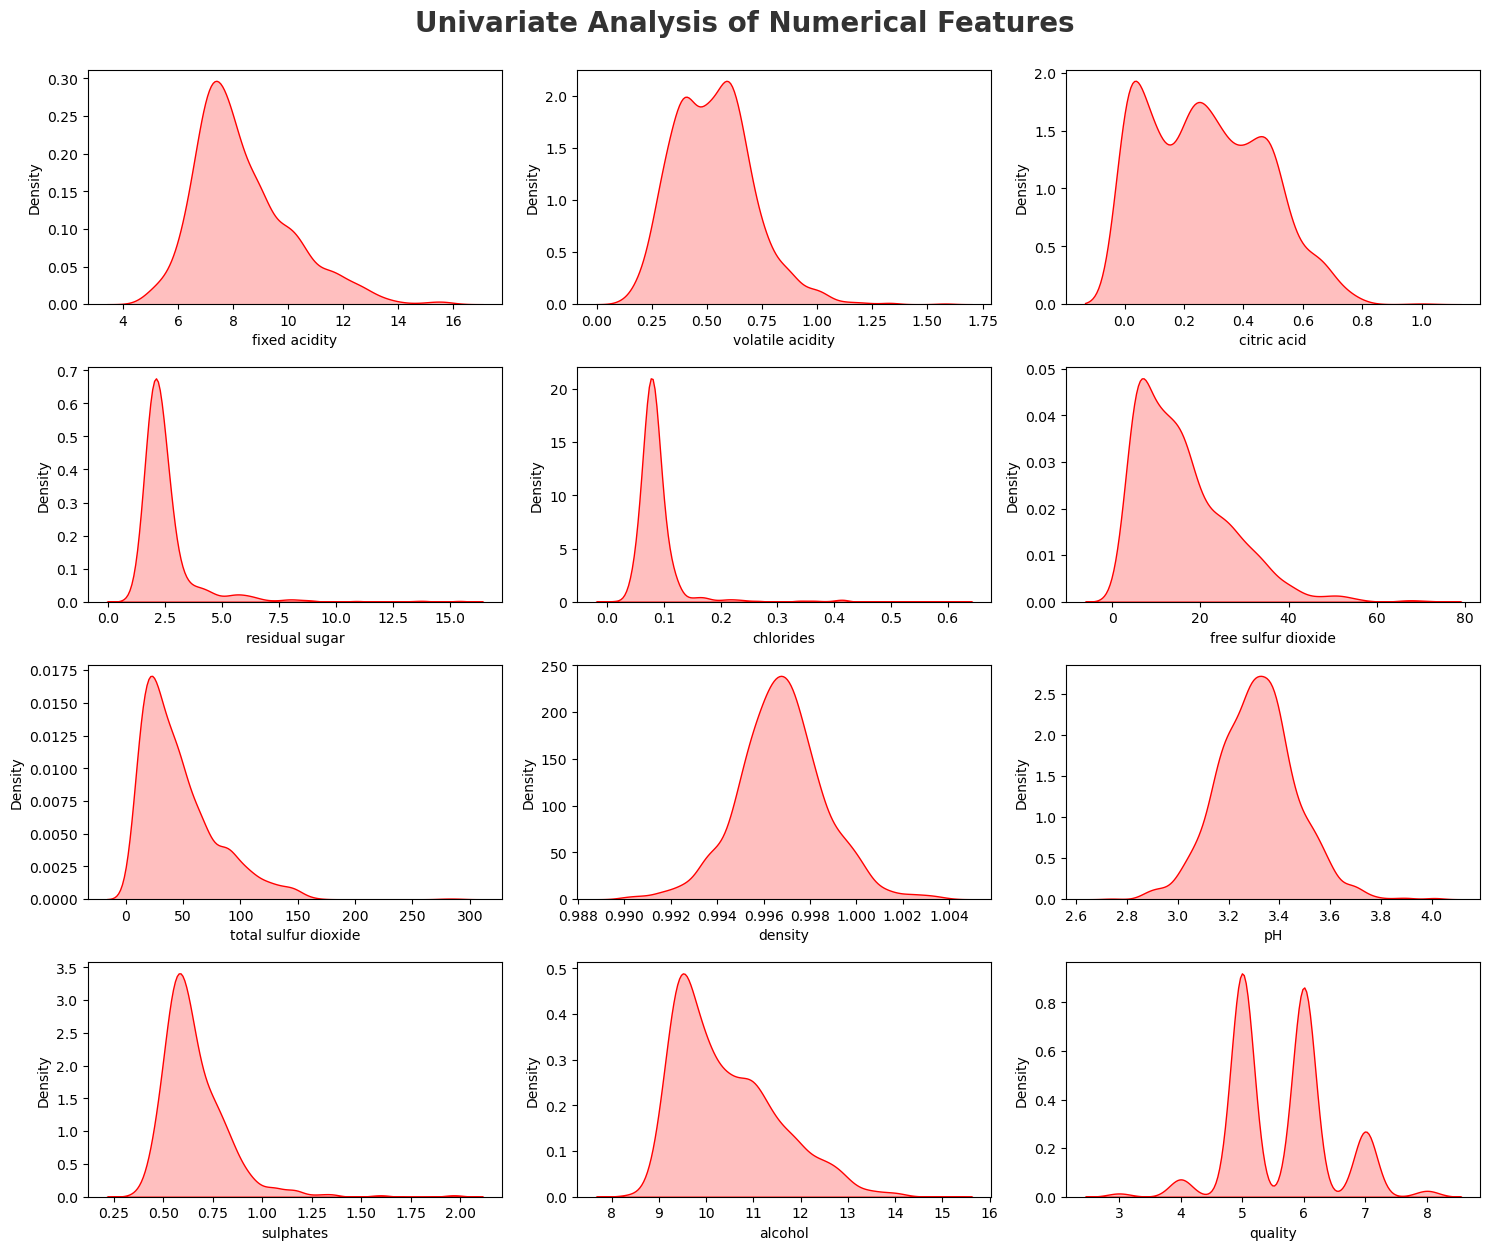

In [13]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(df.columns)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[df.columns[i]],shade=True, color='r')
#    plt.xlabel(numerical[i])
    plt.tight_layout()

In [15]:
# Density , pH , volatle acidity , alcohol exhibits normal distribution

In [16]:
# we reduce non-normality 
# 1. Logarithmic transformation: Apply a logarithm to reduce the impact of extreme values and compress the range of the data.
# 2. Square root transformation: Take the square root of the values to reduce the skewness and bring the distribution closer to normal.

In [17]:
# ANS 6 :
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [21]:
x = df.drop('quality', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)


In [23]:
# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_


In [24]:

cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Find the index where cumulative variance ratio exceeds 90%
n_components = np.argmax(cumulative_variance_ratio >= 0.9) + 1

print("Minimum number of principal components to explain 90% variance:", n_components)


Minimum number of principal components to explain 90% variance: 7
